In [ ]:
import torch
import torch.nn.functional as F

# 模拟数据：3个样本，每个样本是 10 类别的 logits（未归一化）
logits = torch.tensor([
    [2.1, 0.3, -1.5, 1.2, -0.7, 1.8, -0.2, 1.1, -1.1, 0.5],  # 样本1
    [0.9, -0.5, 1.7, -1.2, 0.3, -0.8, 1.5, -0.1, 0.6, -1.0], # 样本2
    [-0.3, 1.2, 0.5, -0.7, 1.0, -1.5, 0.2, -1.8, 1.4, 0.1]   # 样本3
], requires_grad=True)  # 允许梯度反传

# 真实标签（类别索引）
target = torch.tensor([3, 5, 1])  # 样本1的真实类别是3，样本2是5，样本3是1

: 

In [1]:
import torch

In [3]:
import torch.nn as nn

In [18]:
Embed_Table = nn.Embedding(10, 3,max_norm=0.5)
indices = torch.tensor([1, 2, 3, 4, 5])
output = Embed_Table(indices)
print(indices.shape,output.shape)

torch.Size([5]) torch.Size([5, 3])


In [8]:
print(Embed_Table.weight)

Parameter containing:
tensor([[-0.2454, -1.5504,  1.0700],
        [ 0.3138, -0.3636,  0.1389],
        [ 0.1415, -0.3522,  0.0795],
        [ 0.1451, -0.4783, -0.0137],
        [-0.4361,  0.1888, -0.1554],
        [ 0.1952,  0.3351,  0.3156],
        [ 2.4288,  0.3845, -0.2757],
        [-1.1527, -0.3645,  0.0760],
        [ 0.0183, -1.6247,  0.6562],
        [-0.4185,  0.0763,  0.1293]], requires_grad=True)


In [16]:
x = Embed_Table.weight[6].norm(2)
x

tensor(2.4745, grad_fn=<LinalgVectorNormBackward0>)

In [20]:
y = list([torch.tensor([1, 2, 3, 4, 5]),torch.tensor([6, 7, 8, 9, 10])])

In [21]:
y

[tensor([1, 2, 3, 4, 5]), tensor([ 6,  7,  8,  9, 10])]

In [24]:
y_stack = torch.stack(y, dim=1)

In [25]:
y_stack

tensor([[ 1,  6],
        [ 2,  7],
        [ 3,  8],
        [ 4,  9],
        [ 5, 10]])

In [26]:
x = torch.tensor([1, 2, 3, 4, 5])

In [30]:
x.repeat(2,1)

tensor([[1, 2, 3, 4, 5],
        [1, 2, 3, 4, 5]])

In [33]:
x.repeat_interleave(2, dim=-1)

tensor([1, 1, 2, 2, 3, 3, 4, 4, 5, 5])

降维后方差贡献率: [0.28981968 0.24978619]


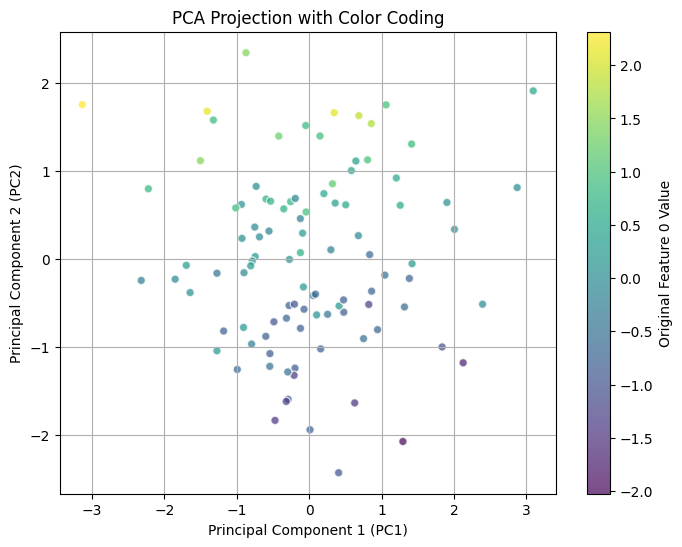

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 生成随机高维数据（100个样本，4个特征）
np.random.seed(42)
X = np.random.randn(100, 4)  # 形状 (100, 4)

# 假设第0列是我们要用颜色表示的特征（例如温度、浓度等）
color_feature = X[:, 0]  # 颜色基于原始数据的第1个特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)  # 降维到2维
X_pca = pca.fit_transform(X_scaled)  # 形状 (100, 2)

print("降维后方差贡献率:", pca.explained_variance_ratio_)
# 输出示例: [0.45, 0.3] 表示前两个主成分解释了75%的方差
plt.figure(figsize=(8, 6))

# 绘制散点图，颜色深浅对应原始数据的第1个特征
scatter = plt.scatter(
    X_pca[:, 0],  # x轴：第一主成分
    X_pca[:, 1],  # y轴：第二主成分
    c=color_feature,  # 颜色值
    cmap='viridis',  # 颜色映射（深→浅）
    alpha=0.7,
    edgecolors='w'
)

# 添加颜色条
plt.colorbar(scatter, label='Original Feature 0 Value')

# 标注坐标轴
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('PCA Projection with Color Coding')

plt.grid(True)
plt.show()

In [38]:
#pca test
import numpy as np
import torch
def manual_pca(X, num_components):
    # 1. 标准化数据
    mean_vals = torch.mean(X, dim=0)
    std_vals = torch.std(X, dim=0)
    standardized_X = (X - mean_vals) / std_vals
    
    # 2. 计算协方差矩阵
    cov_matrix = torch.mm(standardized_X.T, standardized_X) / (X.shape[0] - 1)
    
    # 3. 计算特征值和特征向量
    eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)
    # 4. 选择主成分
    sorted_indices = torch.argsort(eigenvalues, descending=True)
    selected_indices = sorted_indices[:num_components]
    principal_components = eigenvectors[:, selected_indices]
    
    # 5. 将数据投影到主成分上
    reduced_X = torch.matmul(standardized_X, principal_components)
    
    return reduced_X, principal_components
 
 
# X 是数据矩阵，每一行是一个样本，每一列是一个特征
# num_components 是要保留的主成分数量
X = np.array([[1,1],[2,2]])
X = torch.tensor(X, dtype=torch.float32)  # 转换为 PyTorch 张量
 
# 手动PCA
reduced_X, principal_components = manual_pca(X, num_components=1)
 
 
print("原始数据矩阵：\n", X)
print("\n降维后的数据矩阵：\n", reduced_X)
print("\n选定的主成分：\n", principal_components)

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
sklearn_result = pca.fit_transform(X.numpy())
print("Sklearn PCA 结果：\n", sklearn_result)

原始数据矩阵：
 tensor([[1., 1.],
        [2., 2.]])

降维后的数据矩阵：
 tensor([[-1.0000],
        [ 1.0000]])

选定的主成分：
 tensor([[0.7071],
        [0.7071]])
Sklearn PCA 结果：
 [[-0.7071068 ]
 [ 0.70710677]]


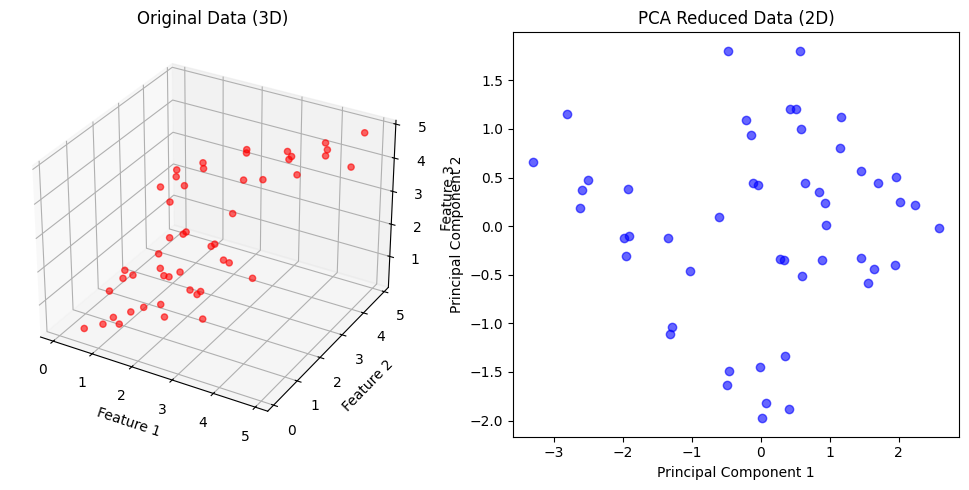

In [40]:
import matplotlib.pyplot as plt
np.random.seed(42)
X = np.random.rand(50, 3) * 5
X[:, 2] = 0.5 * X[:, 0] + 0.5 * X[:, 1]  # 人为制造线性相关性
X = torch.tensor(X, dtype=torch.float32)

# 手动 PCA 降维到 2D
reduced_X, principal_components = manual_pca(X, num_components=2)

# 转换为 NumPy 方便绘图
reduced_X = reduced_X.numpy()

# 可视化
plt.figure(figsize=(10, 5))

# 1. 原始数据（3D）
ax1 = plt.subplot(1, 2, 1, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c='r', marker='o', alpha=0.6)
ax1.set_title("Original Data (3D)")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("Feature 3")

# 2. 降维后的数据（2D）
plt.subplot(1, 2, 2)
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c='b', alpha=0.6)
plt.title("PCA Reduced Data (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

In [4]:
numpy_array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [12]:
torch_tensor

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
numpy_array.mean(axis=0),numpy_array.std(axis=0)

(array([4., 5., 6.]), array([2.44948974, 2.44948974, 2.44948974]))

In [13]:
torch_tensor.mean(dim=0,dtype=torch.float32)

tensor([4., 5., 6.])

In [17]:
import math
math.sqrt(6)

2.449489742783178

In [18]:
torch_tensor.cov()

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [21]:
L_complex, V_complex = torch.linalg.eig(torch_tensor)

In [22]:
L_complex, V_complex

(tensor([ 1.6117e+01+0.j, -1.1168e+00+0.j,  2.9486e-07+0.j]),
 tensor([[-0.2320+0.j, -0.7858+0.j,  0.4082+0.j],
         [-0.5253+0.j, -0.0868+0.j, -0.8165+0.j],
         [-0.8187+0.j,  0.6123+0.j,  0.4082+0.j]]))